In [274]:
from keras.datasets import mnist, cifar10, imdb
from keras.layers.core import Activation, Dropout, Dense, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.visualize_util import model_to_dot, plot

from IPython.display import SVG, display
from sklearn import datasets, preprocessing
import numpy as np
from numpy.random import *

from PIL import Image
import glob

In [272]:
# cnn parameters
batch_size = 64
nb_classes = 25
nb_epoch = 12
nb_filters = 4
nb_pool = 2
nb_conv = 3

# input image dimensions
img_channels = 3
img_rows, img_cols = 64, 64
# train:test ratio
test_ratio = 0.2

In [275]:
# load data from image file
labels =[line.rstrip() for line in open("../data/dog_labels.tsv")]

X_train = np.empty((0, 3, img_rows, img_cols), dtype=np.uint8)
X_test = np.empty((0, 3, img_rows, img_cols), dtype=np.uint8)
Y_train = np.empty((0, 1), dtype=np.int)
Y_test = np.empty((0, 1), dtype=np.int)
for i, label in enumerate(labels):
    imgs = glob.glob("../data/images/resized/{label}*".format(label=label))
    for j, img in enumerate(imgs):
        try:
            if rand() > test_ratio:
                X_train = np.append(X_train, [np.array(Image.open(img)).transpose(2, 0, 1)], axis=0)
                Y_train = np.append(Y_train, [np.array([i])], axis=0)
            else:
                X_test = np.append(X_test, [np.array(Image.open(img)).transpose(2, 0, 1)], axis=0)
                Y_test = np.append(Y_test,  [np.array([i])], axis=0)
        except ValueError:
            print label, j

staffordshire_bull_terrier 100
staffordshire_bull_terrier 106


In [276]:
# transform data
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

('X_train shape:', (3690, 3, 64, 64))
(3690, 'train samples')
(898, 'test samples')


In [282]:
model = Sequential()
model.add(Convolution2D(nb_filter, 3, 3, input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filter, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

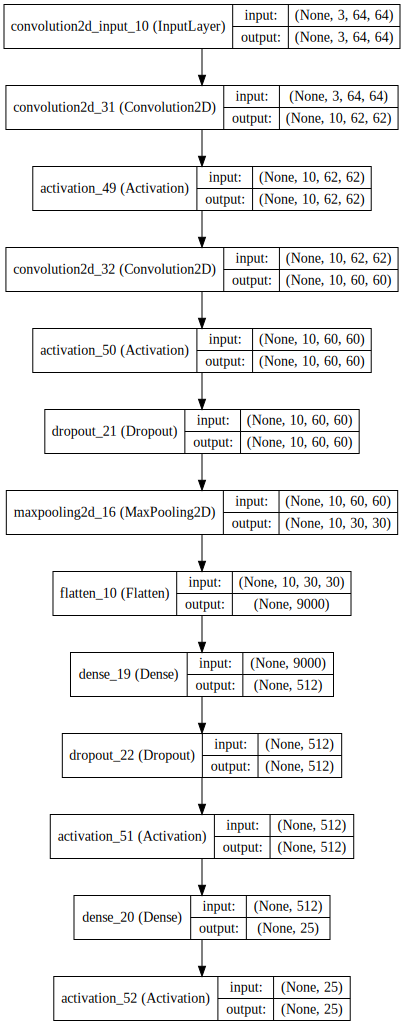

In [283]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [284]:
# モデルをコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [285]:
model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=batch_size)

Epoch 1/12
3690/3690 [==============================] - 61s - loss: 3.1744 - acc: 0.0585    
Epoch 2/12
3690/3690 [==============================] - 62s - loss: 3.0209 - acc: 0.1041    
Epoch 3/12
3690/3690 [==============================] - 64s - loss: 2.8313 - acc: 0.1645    
Epoch 4/12
3690/3690 [==============================] - 79s - loss: 2.6318 - acc: 0.2287    
Epoch 5/12
3690/3690 [==============================] - 60s - loss: 2.3982 - acc: 0.2905    
Epoch 6/12
3690/3690 [==============================] - 64s - loss: 2.1626 - acc: 0.3656    
Epoch 7/12
3690/3690 [==============================] - 67s - loss: 1.8965 - acc: 0.4390    
Epoch 8/12
3690/3690 [==============================] - 68s - loss: 1.6067 - acc: 0.5271    
Epoch 9/12
3690/3690 [==============================] - 68s - loss: 1.3233 - acc: 0.6076    
Epoch 10/12
3690/3690 [==============================] - 70s - loss: 1.0526 - acc: 0.6981    
Epoch 11/12
3690/3690 [==============================] - 67s - loss: 

In [289]:
model.evaluate(X_test, Y_test)

898/898 [==============================] - 7s     


[2.9733683415138907, 0.17483296213808464]

In [291]:
model_json = model.to_json()
open("../model/dog-discrimination/architecture.json", "w").write(model_json)
model.save_weights("../model/dog-discrimination/weights.h5", overwrite=True)